In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
%matplotlib inline

In [2]:
def plot_data(X, y, feature_names, resolution=0.02):
    axis_max = abs(x).max().round() + 1
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    plt.xlim(-axis_max, axis_max)
    plt.ylim(-axis_max, axis_max)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Data')

def plot_decision_boundaries(X, y, clf, feature_names, resolution=0.02):
    # Plot the decision surface
    axis_max = abs(x).max().round() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(-axis_max, axis_max, resolution),
                           np.arange(-axis_max, axis_max, resolution))
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    plt.figure(figsize=(8, 8))
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    
    # Plot class sample
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    
    plt.xlim(-axis_max, axis_max)
    plt.ylim(-axis_max, axis_max)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

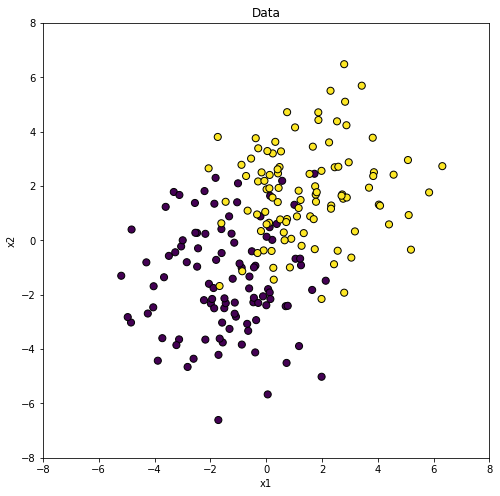

In [3]:
def get_2d(n_samples, mean, variance):
    """
    Returns 2-dimensional n_samples of each class (0 and 1) 
    coming from normal distribution of ((mean, mean), variance) and ((-mean, -mean), variance) 
    for classes 0 and 1 respectively
    """
    k1 = np.random.multivariate_normal([-mean, -mean],[[variance,0],[0,variance]], size=n_samples)
    k2 = np.random.multivariate_normal([mean, mean],[[variance,0],[0,variance]], size=n_samples)
    x = np.concatenate([k1,k2])
    y = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])
    return x, y
    
n_samples = 100
mean = 1.5
variance = 3
x, y = get_2d(n_samples, mean, variance)
plot_data(x, y, ['x1','x2'])

accuracy=0.905


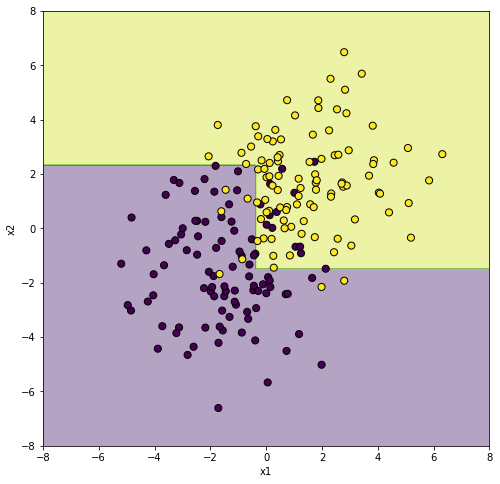

In [4]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
tree.fit(x, y)
plot_decision_boundaries(x, y, tree, ['x1','x2'])
accuracy = tree.score(x, y)
print('accuracy={0}'.format(accuracy))

# Plot Tree

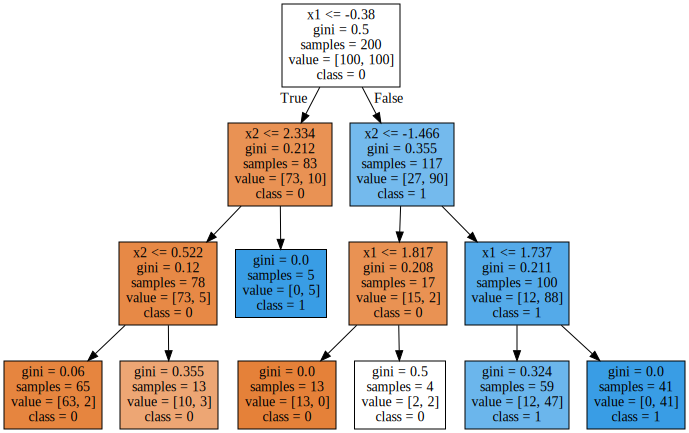

In [5]:
def plot_tree(tree, features=['x1','x2'], labels=['0', '1']):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))
    
plot_tree(tree)

# Train - Test

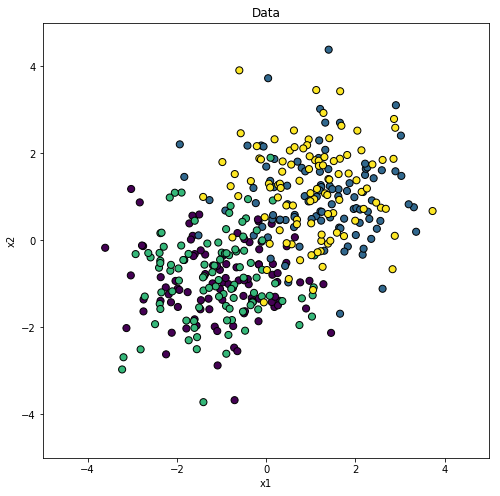

In [6]:
n_train = 200
n_test = 100
mean = 1
variance = 1
x_train, y_train = get_2d(n_samples, mean, variance)
x_test, y_test = get_2d(n_test, mean, variance)
y = np.concatenate([y_train, y_test+2])
x = np.concatenate([x_train, x_test])
plot_data(x, y, ['x1','x2'])

Train accuracy=0.985, Test accuracy=0.9


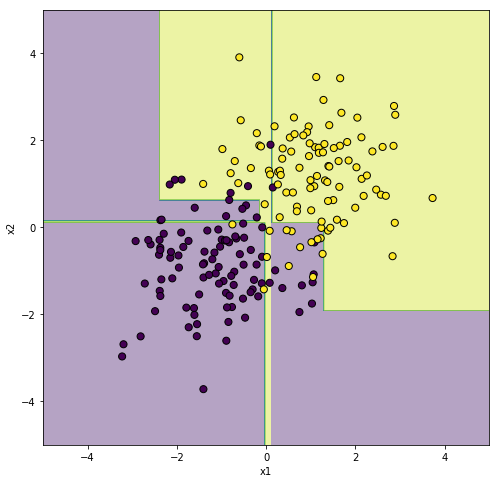

In [7]:
tree = DecisionTreeClassifier(random_state=0, max_depth=5)
tree.fit(x, y)
tree.fit(x_train, y_train)
plot_decision_boundaries(x_test, y_test, tree, ['x1','x2'])
train_accuracy = tree.score(x_train, y_train)
test_accuracy = tree.score(x_test, y_test)
print('Train accuracy={0}, Test accuracy={1}'.format(train_accuracy, test_accuracy))

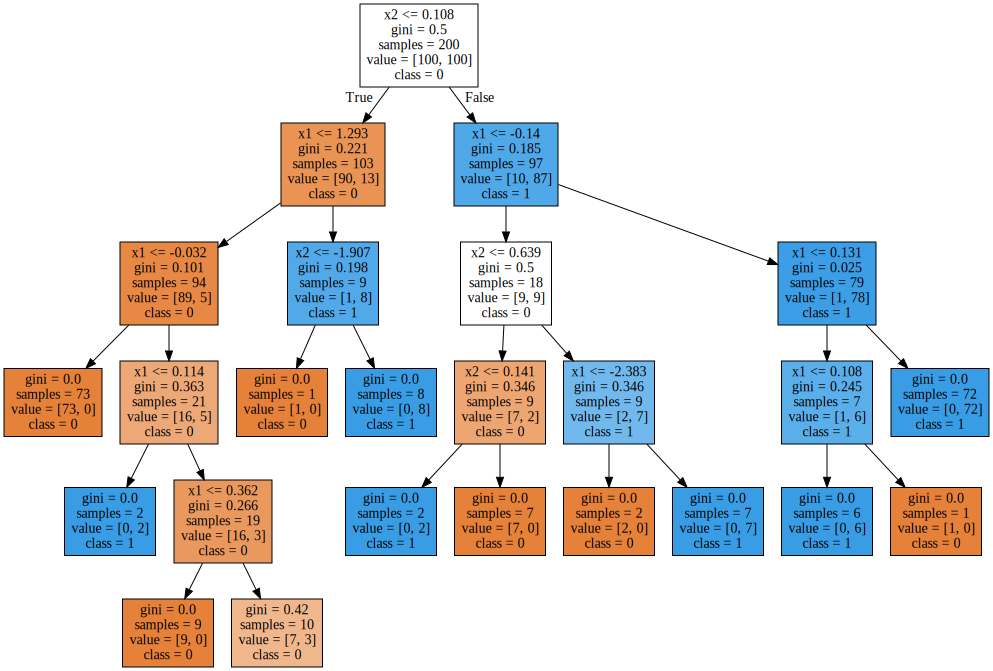

In [8]:
plot_tree(tree)